#Import Libraries

In [ ]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 4.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import linprog
from scipy.stats import linregress
from pulp import *

#Obtain Processed Data

In [ ]:
bbl_inn1 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/bbl_inn1.csv")
bbl_inn2 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/bbl_inn2.csv")
bpl_inn1 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/bpl_inn1.csv")
bpl_inn2 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/bpl_inn2.csv")
cpl_inn1 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/cpl_inn1.csv")
cpl_inn2 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/cpl_inn2.csv")
ipl_inn1 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/ipl_inn1.csv")
ipl_inn2 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/ipl_inn2.csv")
psl_inn1 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/psl_inn1.csv")
psl_inn2 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/psl_inn2.csv")
t20s_inn1 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/t20s_inn1.csv")
t20s_inn2 = pd.read_csv("https://raw.githubusercontent.com/Optimal-Lineup-T20-FYP/Datasets/main/PreprocessedDataBeforeWC/t20s_inn2.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
bbl_inn1.drop(columns=['Unnamed: 0.1'],inplace=True)
bbl_inn2.drop(columns=['Unnamed: 0.1'],inplace=True)
bpl_inn1.drop(columns=['Unnamed: 0.1'],inplace=True)
bpl_inn2.drop(columns=['Unnamed: 0.1'],inplace=True)
cpl_inn1.drop(columns=['Unnamed: 0.1'],inplace=True)
cpl_inn2.drop(columns=['Unnamed: 0.1'],inplace=True)
ipl_inn1.drop(columns=['Unnamed: 0.1'],inplace=True)
ipl_inn2.drop(columns=['Unnamed: 0.1'],inplace=True)
psl_inn1.drop(columns=['Unnamed: 0.1'],inplace=True)
psl_inn2.drop(columns=['Unnamed: 0.1'],inplace=True)
t20s_inn1.drop(columns=['Unnamed: 0.1'],inplace=True)
t20s_inn2.drop(columns=['Unnamed: 0.1'],inplace=True)
bbl_inn1.drop(columns=['Unnamed: 0'],inplace=True)
bbl_inn2.drop(columns=['Unnamed: 0'],inplace=True)
bpl_inn1.drop(columns=['Unnamed: 0'],inplace=True)
bpl_inn2.drop(columns=['Unnamed: 0'],inplace=True)
cpl_inn1.drop(columns=['Unnamed: 0'],inplace=True)
cpl_inn2.drop(columns=['Unnamed: 0'],inplace=True)
ipl_inn1.drop(columns=['Unnamed: 0'],inplace=True)
ipl_inn2.drop(columns=['Unnamed: 0'],inplace=True)
psl_inn1.drop(columns=['Unnamed: 0'],inplace=True)
psl_inn2.drop(columns=['Unnamed: 0'],inplace=True)
t20s_inn1.drop(columns=['Unnamed: 0'],inplace=True)
t20s_inn2.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
t20s_inn1.shape[0]+t20s_inn2.shape[0]

145925

#Separate train and selection data

In [ ]:
def get_selection_data(country,bbl_inn1,bbl_inn2,bpl_inn1,bpl_inn2,cpl_inn1,cpl_inn2,psl_inn1,psl_inn2,ipl_inn1,ipl_inn2,t20s_inn1,t20s_inn2):
  pow = ['2021', '2019/20',
       '2018/19', '2020/21', '2018', '2017', '2016',
       '2017/18', '2016/17','2020', '2019']
  frames = [t20s_inn1,t20s_inn2]
  t20s = pd.concat(frames)
  pre_wc = t20s[~t20s['season'].isin(pow)]
  post_wc = t20s[t20s['season'].isin(pow)]
  t20s_selection_data = post_wc[(post_wc['batting_team']==country)|(post_wc['bowling_team']==country)]
  if country=="India":
    frames = [ipl_inn1,ipl_inn2]
    ipl = pd.concat(frames)
    league_selection_data = ipl[ipl['season'].isin(pow)]
    return t20s_selection_data,league_selection_data

In [ ]:
def get_t20s_train_data(conutry,bbl_inn1,bbl_inn2,bpl_inn1,bpl_inn2,cpl_inn1,cpl_inn2,psl_inn1,psl_inn2,ipl_inn1,ipl_inn2,t20s_inn1,t20s_inn2):
  pow = ['2021', '2019/20',
       '2018/19', '2020/21', '2018', '2017', '2016',
       '2017/18', '2016/17','2020', '2019']
  frames = [t20s_inn1,t20s_inn2]
  t20s = pd.concat(frames)
  pre_wc = t20s[~t20s['season'].isin(pow)]
  post_wc = t20s[t20s['season'].isin(pow)]
  post_wc_without_country = post_wc[(post_wc['batting_team']!=country) & (post_wc['bowling_team']!=country)]
  frames = [pre_wc,post_wc_without_country]
  t20s_train = pd.concat(frames)
  if country=="India":
    frames = [ipl_inn1,ipl_inn2]
    ipl = pd.concat(frames)
    leagues_train = ipl[ipl['season'].isin(pow)]
    frames = [leagues_train,bbl_inn1,bbl_inn2,bpl_inn1,bpl_inn2,cpl_inn1,cpl_inn2,psl_inn1,psl_inn2]
    leagues_train = pd.concat(frames)
    return t20s_train,leagues_train

In [ ]:
country = "India"
t20s_selection_data,league_selection_data = get_selection_data(country,bbl_inn1,bbl_inn2,bpl_inn1,bpl_inn2,cpl_inn1,cpl_inn2,psl_inn1,psl_inn2,ipl_inn1,ipl_inn2,t20s_inn1,t20s_inn2)
t20s_train,leagues_train = get_t20s_train_data(country,bbl_inn1,bbl_inn2,bpl_inn1,bpl_inn2,cpl_inn1,cpl_inn2,psl_inn1,psl_inn2,ipl_inn1,ipl_inn2,t20s_inn1,t20s_inn2)

In [ ]:
leagues_train.shape[0]+t20s_train.shape[0]

436757

In [ ]:
print(t20s_selection_data.shape[0])
print(league_selection_data.shape[0])
#t20s_selection_data.match_id.nunique()

15869
41877


#Data Frame Names - 

Selection
1. t20s_inn2
2. t20s_inn2
3. league_inn1
4. league_inn2

Training
1. tt_inn1
2. tt_inn2
3. lt_inn1
4. lt_inn2


In [ ]:
#train
tt_inn1 = t20s_train[t20s_train['innings']==1]
tt_inn2 = t20s_train[t20s_train['innings']==2]
lt_inn1 = leagues_train[leagues_train['innings']==1]
lt_inn2 = leagues_train[leagues_train['innings']==2]
#select
t20s_inn1 = t20s_selection_data[t20s_selection_data['innings']==1]
t20s_inn2 = t20s_selection_data[t20s_selection_data['innings']==2]
league_inn1 = league_selection_data[league_selection_data['innings']==1]
league_inn2 = league_selection_data[league_selection_data['innings']==2]

In [ ]:
print(t20s_inn1.shape[0])
print(t20s_inn2.shape[0])
t20s_inn1.shape[0]+t20s_inn2.shape[0]

8382
7487


15869

#Train LR model to predict outcome 

##Train

###1st Innings

####T20S Train

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

tt_inn1 = t20s_train[t20s_train['innings']==1]
tt_inn1 = tt_inn1.sort_values(by=['ball'], ascending=True)
tt_inn1.reset_index(inplace=True)
x = tt_inn1[['ball', 'total_runs_scored', 'wickets_remaining','striker_score','partnership']]
y = tt_inn1['runs_off_bat']

predict_inn1_t20s = LinearRegression()
predict_inn1_t20s.fit(x,y)

LinearRegression()

####League

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lt_inn1 = leagues_train[leagues_train['innings']==1]
lt_inn1 = lt_inn1.sort_values(by=['ball'], ascending=True)

x = lt_inn1[['ball', 'total_runs_scored', 'wickets_remaining','striker_score','partnership']]
y = lt_inn1['runs_off_bat']

predict_inn1_leagues = LinearRegression()
predict_inn1_leagues.fit(x,y)

LinearRegression()

###2nd Innings

####T20S Train

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

tt_inn2 = t20s_train[t20s_train['innings']==2]
tt_inn2 = tt_inn2.sort_values(by=['ball'], ascending=True)

x = tt_inn2[['ball', 'total_runs_scored', 'wickets_remaining','striker_score','partnership','required_run_rate']]
y = tt_inn2['runs_off_bat']

predict_inn2_t20s = LinearRegression()
predict_inn2_t20s.fit(x,y)

LinearRegression()

####League

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lt_inn2 = leagues_train[leagues_train['innings']==2]
lt_inn2 = lt_inn2.sort_values(by=['ball'], ascending=True)

x = lt_inn2[['ball', 'total_runs_scored', 'wickets_remaining','striker_score','partnership','required_run_rate']]
y = lt_inn2['runs_off_bat']

predict_inn2_leagues = LinearRegression()
predict_inn2_leagues.fit(x,y)

LinearRegression()

##Predict

###1st Innings

####T20S

In [ ]:
t20s_inn1 = t20s_selection_data[t20s_selection_data['innings']==1]
t20s_inn1.reset_index(inplace=True)
y_pred = predict_inn1_t20s.predict(t20s_inn1[['ball', 'total_runs_scored', 'wickets_remaining','striker_score','partnership']])
print("Min of prediction: ",min(y_pred))
print("Max of prediction: ",max(y_pred))
t20s_inn1['predicted'] = y_pred

Min of prediction:  0.8043180410861585
Max of prediction:  2.525618627609929


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
t20s_inn1.shape[0]

8382

####League

In [ ]:
league_inn1 = league_selection_data[league_selection_data['innings']==1]
league_inn1.reset_index(inplace=True)
y_pred = predict_inn1_leagues.predict(league_inn1[['ball', 'total_runs_scored', 'wickets_remaining','striker_score','partnership']])
print("Min of prediction: ",min(y_pred))
print("Max of prediction: ",max(y_pred))
league_inn1['predicted'] = y_pred

Min of prediction:  0.720681162570753
Max of prediction:  2.600117476587535


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###2nd Innings

####T20S

In [ ]:
t20s_inn2 = t20s_selection_data[t20s_selection_data['innings']==2]
t20s_inn2.reset_index(inplace=True)
y_pred = predict_inn2_t20s.predict(t20s_inn2[['ball', 'total_runs_scored', 'wickets_remaining','striker_score','partnership','required_run_rate']])
print("Min of prediction: ",min(y_pred))
print("Max of prediction: ",max(y_pred))
t20s_inn2['predicted'] = y_pred

Min of prediction:  0.8650330490584719
Max of prediction:  2.3019981900122186


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
t20s_inn2.shape[0]

7487

####League

In [ ]:
league_inn2 = league_selection_data[league_selection_data['innings']==2]
league_inn2.reset_index(inplace=True)
y_pred = predict_inn2_leagues.predict(league_inn2[['ball', 'total_runs_scored', 'wickets_remaining','striker_score','partnership','required_run_rate']])
print("Min of prediction: ",min(y_pred))
print("Max of prediction: ",max(y_pred))
league_inn2['predicted'] = y_pred

Min of prediction:  0.9230795942832063
Max of prediction:  2.6658631313152807


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Validate Model

##T20s Innings 1

In [ ]:
random_prediction = list(np.random.randint(low = 0,high=7,size=t20s_inn1.shape[0]))
t20s_inn1['random'] = random_prediction
from sklearn.metrics import mean_absolute_error
print("mae of random: ",mean_absolute_error(t20s_inn1['runs_off_bat'],t20s_inn1['random']))
print("mae of predicted: ",mean_absolute_error(t20s_inn1['runs_off_bat'],t20s_inn1['predicted']))

mae of random:  2.521474588403722
mae of predicted:  1.1726336502348567


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
t20s_inn1.shape[0]

8382

##T20s Innings 2

In [ ]:
random_prediction = list(np.random.randint(low = 0,high=7,size=t20s_inn2.shape[0]))
t20s_inn2['random'] = random_prediction
from sklearn.metrics import mean_absolute_error
print("mae of random: ",mean_absolute_error(t20s_inn2['runs_off_bat'],t20s_inn2['random']))
print("mae of predicted: ",mean_absolute_error(t20s_inn2['runs_off_bat'],t20s_inn2['predicted']))

mae of random:  2.496460531588086
mae of predicted:  1.1632415218499594


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
t20s_inn2.shape[0]

7487

##League Innings 1

In [ ]:
random_prediction = list(np.random.randint(low = 0,high=7,size=league_inn1.shape[0]))
league_inn1['random'] = random_prediction
from sklearn.metrics import mean_absolute_error
print("mae of random: ",mean_absolute_error(league_inn1['runs_off_bat'],league_inn1['random']))
print("mae of predicted: ",mean_absolute_error(league_inn1['runs_off_bat'],league_inn1['predicted']))

mae of random:  2.535637233750441
mae of predicted:  1.161196252047345


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##League Innings 2

In [ ]:
random_prediction = list(np.random.randint(low = 0,high=7,size=league_inn2.shape[0]))
league_inn2['random'] = random_prediction
from sklearn.metrics import mean_absolute_error
print("mae of random: ",mean_absolute_error(league_inn2['runs_off_bat'],league_inn2['random']))
print("mae of predicted: ",mean_absolute_error(league_inn2['runs_off_bat'],league_inn2['predicted']))

mae of random:  2.5062255859375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


mae of predicted:  1.183734012091377


#Train LR model to find the value of a wicket

In [ ]:
def runs_possible(r,p):
  if p>=r:
    return r
  elif r>p:
    return p

##League Innings 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lt_inn1_wickets = lt_inn1[~lt_inn1['player_dismissed'].isnull()]
lt_inn1_wickets.reset_index(inplace=True)

lt_inn1_wickets = lt_inn1_wickets.sort_values(by=['wickets_remaining'], ascending=True)

x = lt_inn1_wickets[['balls_remaining','wickets_remaining']]
y = lt_inn1_wickets['runs_remaining']

value_of_wicket_inn1_leagues = LinearRegression()
value_of_wicket_inn1_leagues.fit(x,y)

LinearRegression()

##League Innings 2

In [ ]:
lt_inn2['runs_possible'] = lt_inn2['target']-lt_inn2['total_runs_scored']-lt_inn2['runs_off_bat'] - lt_inn2['extras']
lt_inn2['runs_remaining'] = np.vectorize(runs_possible)(lt_inn2['runs_remaining'],lt_inn2['runs_possible'])
lt_inn2_wickets = lt_inn2[~lt_inn2['player_dismissed'].isnull()]
lt_inn2_wickets.reset_index(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lt_inn2_wickets = lt_inn2_wickets.sort_values(by=['wickets_remaining'], ascending=True)
x = lt_inn2_wickets[['balls_remaining','wickets_remaining']]
y = lt_inn2_wickets['runs_remaining']
value_of_wicket_inn2_leagues = LinearRegression()
value_of_wicket_inn2_leagues.fit(x,y)

LinearRegression()

##T20s Innings1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

tt_inn1_wickets = tt_inn1[~tt_inn1['player_dismissed'].isnull()]
tt_inn1_wickets.reset_index(inplace=True)

tt_inn1_wickets = tt_inn1_wickets.sort_values(by=['wickets_remaining'], ascending=True)

x = tt_inn1_wickets[['balls_remaining','wickets_remaining']]
y = tt_inn1_wickets['runs_remaining']

value_of_wicket_inn1_t20s = LinearRegression()
value_of_wicket_inn1_t20s.fit(x,y)

LinearRegression()

##T20s Innings2

In [ ]:
tt_inn2['runs_possible'] = tt_inn2['target']-tt_inn2['total_runs_scored']-tt_inn2['runs_off_bat'] - tt_inn2['extras']
tt_inn2['runs_remaining'] = np.vectorize(runs_possible)(tt_inn2['runs_remaining'],tt_inn2['runs_possible'])
tt_inn2_wickets = tt_inn2[~tt_inn2['player_dismissed'].isnull()]
tt_inn2_wickets.reset_index(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
tt_inn2_wickets = tt_inn2_wickets.sort_values(by=['wickets_remaining'], ascending=True)
x = tt_inn2_wickets[['balls_remaining','wickets_remaining']]
y = tt_inn2_wickets['runs_remaining']
value_of_wicket_inn2_t20s = LinearRegression()
value_of_wicket_inn2_t20s.fit(x,y)

LinearRegression()

#Predict value of wicket

##T20s Innings 1

In [ ]:
t20s_inn1_wickets = t20s_inn1[~t20s_inn1['player_dismissed'].isnull()]
t20s_inn1_wickets.reset_index(inplace=True)
y_pred = value_of_wicket_inn1_t20s.predict(t20s_inn1_wickets[['balls_remaining','wickets_remaining']])
print("Min of prediction: ",min(y_pred))
print("Max of prediction: ",max(y_pred))
t20s_inn1_wickets['predicted_runs_remaining'] = y_pred
t20s_inn1_wickets['value_of_wicket'] = (t20s_inn1_wickets['predicted_runs_remaining'] - t20s_inn1_wickets['runs_remaining'])/t20s_inn1_wickets['balls_remaining']
t20s_inn1_wickets['value_of_wicket'].describe()

Min of prediction:  -13.000536121989466
Max of prediction:  143.52099623605577


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


count    404.000000
mean       0.088253
std        1.270760
min       -6.500268
25%       -0.322135
50%       -0.047331
75%        0.242504
max       11.157295
Name: value_of_wicket, dtype: float64

In [ ]:
t20s_inn1.shape[0]

8382

##T20S Innings 2

In [ ]:
t20s_inn2['runs_possible'] = t20s_inn2['target']-t20s_inn2['total_runs_scored']-t20s_inn2['runs_off_bat'] - t20s_inn2['extras']
t20s_inn2['runs_remaining'] = np.vectorize(runs_possible)(t20s_inn2['runs_remaining'],t20s_inn2['runs_possible'])
t20s_inn2_wickets = t20s_inn2[~t20s_inn2['player_dismissed'].isnull()]
t20s_inn2_wickets.reset_index(inplace=True)
y_pred = value_of_wicket_inn2_t20s.predict(t20s_inn2_wickets[['balls_remaining','wickets_remaining']])
print("Min of prediction: ",min(y_pred))
print("Max of prediction: ",max(y_pred))
t20s_inn2_wickets['predicted_runs_remaining'] = y_pred
t20s_inn2_wickets['predicted_runs_remaining'] = np.vectorize(runs_possible)(t20s_inn2_wickets['predicted_runs_remaining'],t20s_inn2_wickets['runs_possible'])
t20s_inn2_wickets['value_of_wicket'] = (t20s_inn2_wickets['predicted_runs_remaining'] - t20s_inn2_wickets['runs_remaining'])/t20s_inn2_wickets['balls_remaining']
t20s_inn2_wickets['value_of_wicket'].describe()

Min of prediction:  -7.9107216189979965
Max of prediction:  126.07512646488011


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

count    354.000000
mean      -0.097630
std        0.590661
min       -3.661517
25%       -0.347951
50%       -0.052084
75%        0.072784
max        4.908965
Name: value_of_wicket, dtype: float64

In [ ]:
t20s_inn2.shape[0]

7487

##League Innings 1

In [ ]:
league_inn1_wickets = league_inn1[~league_inn1['player_dismissed'].isnull()]
league_inn1_wickets.reset_index(inplace=True)
y_pred = value_of_wicket_inn1_leagues.predict(league_inn1_wickets[['balls_remaining','wickets_remaining']])
print("Min of prediction: ",min(y_pred))
print("Max of prediction: ",max(y_pred))
league_inn1_wickets['predicted_runs_remaining'] = y_pred
league_inn1_wickets['value_of_wicket'] = (league_inn1_wickets['predicted_runs_remaining'] - league_inn1_wickets['runs_remaining'])/league_inn1_wickets['balls_remaining']
league_inn1_wickets['value_of_wicket'].describe()

Min of prediction:  -13.760067343623318
Max of prediction:  146.43892990184565


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


count    1247.000000
mean       -0.010932
std         1.634330
min       -13.760067
25%        -0.404675
50%        -0.047302
75%         0.251136
max        21.477738
Name: value_of_wicket, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


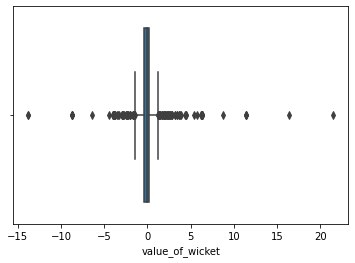

In [ ]:
sns.boxplot(league_inn1_wickets.value_of_wicket)

##Leagues Innings 2

In [ ]:
league_inn2['runs_possible'] = league_inn2['target']-league_inn2['total_runs_scored']-league_inn2['runs_off_bat'] - league_inn2['extras']
league_inn2['runs_remaining'] = np.vectorize(runs_possible)(league_inn2['runs_remaining'],league_inn2['runs_possible'])
league_inn2_wickets = league_inn2[~league_inn2['player_dismissed'].isnull()]
league_inn2_wickets.reset_index(inplace=True)
y_pred = value_of_wicket_inn2_leagues.predict(league_inn2_wickets[['balls_remaining','wickets_remaining']])
print("Min of prediction: ",min(y_pred))
print("Max of prediction: ",max(y_pred))
league_inn2_wickets['predicted_runs_remaining'] = y_pred
league_inn2_wickets['predicted_runs_remaining'] = np.vectorize(runs_possible)(league_inn2_wickets['predicted_runs_remaining'],league_inn2_wickets['runs_possible'])
league_inn2_wickets['value_of_wicket'] = (league_inn2_wickets['predicted_runs_remaining'] - league_inn2_wickets['runs_remaining'])/league_inn2_wickets['balls_remaining']
league_inn2_wickets['value_of_wicket'].describe()

Min of prediction:  -8.654896719956277
Max of prediction:  134.3360644770843


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

count    765.000000
mean      -0.225718
std        0.615511
min       -7.614354
25%       -0.365526
50%       -0.090714
75%        0.000000
max        0.928571
Name: value_of_wicket, dtype: float64

#Adding the value of wicket column to the seletion df

In [ ]:
x = t20s_inn1.copy()
x['joinon'] = x.index
y = t20s_inn1_wickets.copy()
y['joinon'] = y.index
dummy_t20s_inn1 = pd.merge(x,y[['joinon','value_of_wicket']],on="joinon",how="left")
dummy_t20s_inn1.value_of_wicket = dummy_t20s_inn1.value_of_wicket.fillna(0)
dummy_t20s_inn1.drop(columns=["joinon"],inplace=True)
t20s_inn1 = dummy_t20s_inn1

In [ ]:
x = t20s_inn2.copy()
x['joinon'] = x.index
y = t20s_inn2_wickets.copy()
y['joinon'] = y.index
dummy_t20s_inn2 = pd.merge(x,y[['joinon','value_of_wicket']],on="joinon",how="left")
dummy_t20s_inn2.value_of_wicket = dummy_t20s_inn2.value_of_wicket.fillna(0)
dummy_t20s_inn2.drop(columns=["joinon"],inplace=True)
t20s_inn2 = dummy_t20s_inn2

In [ ]:
x = league_inn1.copy()
x['joinon'] = x.index
y = league_inn1_wickets.copy()
y['joinon'] = y.index
dummy_league_inn1 = pd.merge(x,y[['joinon','value_of_wicket']],on="joinon",how="left")
dummy_league_inn1.value_of_wicket = dummy_league_inn1.value_of_wicket.fillna(0)
dummy_league_inn1.drop(columns=["joinon"],inplace=True)
league_inn1 = dummy_league_inn1

In [ ]:
x = league_inn2.copy()
x['joinon'] = x.index
y = league_inn2_wickets.copy()
y['joinon'] = y.index
dummy_league_inn2 = pd.merge(x,y[['joinon','value_of_wicket']],on="joinon",how="left")
dummy_league_inn2.value_of_wicket = dummy_league_inn2.value_of_wicket.fillna(0)
dummy_league_inn2.drop(columns=["joinon"],inplace=True)
league_inn2 = dummy_league_inn2

#Calculate Credits

In [ ]:
#merge innings of t20s select data
t20_to_select = [t20s_inn1,t20s_inn2]
t_select = pd.concat(t20_to_select)
#calculate batter and bowler credit for t20s select
t_select['batter_credit'] = t_select['runs_off_bat'] - t_select['predicted'] - t_select['value_of_wicket']
t_select['bowler_credit'] = t_select['predicted'] - t_select['runs_off_bat'] + t_select['value_of_wicket']

In [ ]:
t_select.match_id.nunique()

68

In [ ]:
#merge innings of t20s select data
l_to_select = [league_inn1,league_inn2]
l_select = pd.concat(l_to_select)
#calculate batter and bowler credit for t20s select
l_select['batter_credit'] = l_select['runs_off_bat'] - l_select['predicted'] - l_select['value_of_wicket']
l_select['bowler_credit'] = l_select['predicted'] - l_select['runs_off_bat'] + l_select['value_of_wicket']

In [ ]:
t20s_inn1[t20s_inn1['batting_team']=="India"].match_id.nunique() + t20s_inn2[t20s_inn2['batting_team']=="India"].match_id.nunique()

67

#Add Player details

In [ ]:
indian_batters = t_select[t_select['batting_team']=="India"].groupby('striker').match_id.nunique().to_frame().reset_index().rename(columns={'striker':'player','match_id':'innings_batted'})
indian_bowlers = t_select[t_select['bowling_team']=="India"].groupby('bowler').match_id.nunique().to_frame().reset_index().rename(columns={'bowler':'player','match_id':'innings_bowled'})

In [ ]:
indians_innings_played = pd.merge(indian_batters,indian_bowlers,on="player",how="outer")

In [ ]:
indians_innings_played = indians_innings_played.fillna(0).sort_values(by = "innings_batted" ,ascending=False)

In [ ]:
indian_batters = t_select[t_select['batting_team']=="India"][['striker']].drop_duplicates()
indian_batters.rename(columns={"striker":"player"},inplace=True)
indian_bowlers = t_select[t_select['bowling_team']=="India"][['bowler']].drop_duplicates()
indian_bowlers.rename(columns={"bowler":"player"},inplace=True)
indian_players = [indian_batters,indian_bowlers]
indians = pd.concat(indian_players)
indians = indians.drop_duplicates()
indians = indians['player'].to_list()

In [ ]:
all_league = l_select.copy()

In [ ]:
l_select = l_select[(l_select['striker'].isin(indians)) | (l_select['bowler'].isin(indians))]

In [ ]:
l_select

,index,match_id,team_total,season,start_date,venue,innings,ball,batting_team,bowling_team,...,partnership,runs_remaining,target,required_run_rate,predicted,random,value_of_wicket,runs_possible,batter_credit,bowler_credit
0,81920,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.1,Kings XI Punjab,Mumbai Indians,...,0,42.0,NaN,NaN,1.248748,1,-0.462295,NaN,-0.786452,0.786452
1,81921,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.2,Kings XI Punjab,Mumbai Indians,...,0,41.0,NaN,NaN,1.250646,1,-0.564400,NaN,0.313754,-0.313754
2,81922,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.3,Kings XI Punjab,Mumbai Indians,...,1,40.0,NaN,NaN,1.328463,5,0.191863,NaN,-1.520326,1.520326
3,81923,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.4,Kings XI Punjab,Mumbai Indians,...,2,39.0,NaN,NaN,1.268162,4,0.317230,NaN,-0.585392,0.585392
4,81924,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.5,Kings XI Punjab,Mumbai Indians,...,3,39.0,NaN,NaN,1.340454,3,0.301177,NaN,-1.641631,1.641631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16342,98262,1254103,153,2021,2021-09-29,Dubai International Cricket Stadium,2,5.5,Royal Challengers Bangalore,Rajasthan Royals,...,3,99.0,150.0,1.151163,1.203601,1,0.000000,99.0,-1.203601,1.203601
16343,98263,1254103,153,2021,2021-09-29,Dubai International Cricket Stadium,2,5.6,Royal Challengers Bangalore,Rajasthan Royals,...,3,96.0,150.0,1.164706,1.203876,0,0.000000,96.0,1.796124,-1.796124
16344,98264,1254103,153,2021,2021-09-29,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Rajasthan Royals,...,6,95.0,150.0,1.142857,1.234048,0,0.000000,95.0,-0.234048,0.234048
16346,98266,1254103,153,2021,2021-09-29,Dubai International Cricket Stadium,2,6.3,Royal Challengers Bangalore,Rajasthan Royals,...,8,93.0,150.0,1.146341,1.247857,3,0.000000,93.0,-0.247857,0.247857


In [ ]:
l_select['batter_country'] = ""
l_select['bowler_country'] = ""
l_select.loc[l_select.striker.isin(indians),'batter_country'] = "India"
l_select.loc[l_select.bowler.isin(indians),'bowler_country'] = "India"

In [ ]:
l_select

,index,match_id,team_total,season,start_date,venue,innings,ball,batting_team,bowling_team,...,target,required_run_rate,predicted,random,value_of_wicket,runs_possible,batter_credit,bowler_credit,batter_country,bowler_country
0,81920,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.1,Kings XI Punjab,Mumbai Indians,...,NaN,NaN,1.248748,1,-0.462295,NaN,-0.786452,0.786452,,India
1,81921,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.2,Kings XI Punjab,Mumbai Indians,...,NaN,NaN,1.250646,1,-0.564400,NaN,0.313754,-0.313754,,India
2,81922,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.3,Kings XI Punjab,Mumbai Indians,...,NaN,NaN,1.328463,5,0.191863,NaN,-1.520326,1.520326,India,India
3,81923,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.4,Kings XI Punjab,Mumbai Indians,...,NaN,NaN,1.268162,4,0.317230,NaN,-0.585392,0.585392,,India
4,81924,1136594,174,2018,2018-05-04,Holkar Cricket Stadium,1,16.5,Kings XI Punjab,Mumbai Indians,...,NaN,NaN,1.340454,3,0.301177,NaN,-1.641631,1.641631,India,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16342,98262,1254103,153,2021,2021-09-29,Dubai International Cricket Stadium,2,5.5,Royal Challengers Bangalore,Rajasthan Royals,...,150.0,1.151163,1.203601,1,0.000000,99.0,-1.203601,1.203601,India,
16343,98263,1254103,153,2021,2021-09-29,Dubai International Cricket Stadium,2,5.6,Royal Challengers Bangalore,Rajasthan Royals,...,150.0,1.164706,1.203876,0,0.000000,96.0,1.796124,-1.796124,India,
16344,98264,1254103,153,2021,2021-09-29,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Rajasthan Royals,...,150.0,1.142857,1.234048,0,0.000000,95.0,-0.234048,0.234048,India,
16346,98266,1254103,153,2021,2021-09-29,Dubai International Cricket Stadium,2,6.3,Royal Challengers Bangalore,Rajasthan Royals,...,150.0,1.146341,1.247857,3,0.000000,93.0,-0.247857,0.247857,India,


In [ ]:
l_select['striker']

0        MP Stoinis
1        MP Stoinis
2          AR Patel
3        MP Stoinis
4          AR Patel
            ...    
16342       V Kohli
16343       V Kohli
16344       V Kohli
16346       V Kohli
16348       V Kohli
Name: striker, Length: 27024, dtype: object

#Split Based on Phases

In [ ]:
l_select_pp = l_select[l_select['ball']<=5.6]
l_select_mo = l_select[(l_select['ball']>=6.1) & (l_select['ball']<=15.6)]
l_select_do = l_select[l_select['ball']>=16.1]
t_select_pp = t_select[t_select['ball']<=5.6] 
t_select_mo = t_select[(t_select['ball']>=6.1) & (t_select['ball']<=15.6)]
t_select_do = t_select[t_select['ball']>=16.1]

In [ ]:
#t_select['batter_credit'] = t_select['batter_credit'] - t_select['value_of_wicket']

In [ ]:
#t_select_pp[t_select_pp['striker']=="V Kohli"].batter_credit.sum()

In [ ]:
#t_select[t_select['batter_country'].isnull()][['batting_team','striker','batter_country']].striker.unique()

In [ ]:
#t_select.reset_index(inplace=True)

#Calculate RAA for each phase

##T20s batters

In [ ]:
runs_above_average_batters = t_select_pp.groupby('striker')['batter_credit'].sum().to_frame()
runs_above_average_batters.reset_index(inplace = True)
player_country = t_select_pp[['striker', 'batting_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'striker': 'batter'}, inplace=True)
player_innings = t_select_pp.groupby('striker').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_batters.rename(columns={'striker': 'batter'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_batters,player_innings,on='batter',how='left')
final_score['runs_above_average'] = final_score['batter_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='batter',how='left')
country_pp_batters = final_score_country[(final_score_country['batting_team'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
country_pp_batters.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,batter,batter_credit,index,innings_played,runs_above_average,batting_team
95,V Shankar,7.999616,58,2,3.999808,India
43,KM Jadhav,3.833238,78,1,3.833238,India
70,RD Gaikwad,6.385578,60,2,3.192789,India
42,KL Rahul,124.125137,2,39,3.182696,India
32,Ishan Kishan,5.855847,64,2,2.927923,India
71,RG Sharma,140.447536,0,49,2.866276,India
77,SA Yadav,2.756195,97,1,2.756195,India
79,SK Raina,27.490208,4,12,2.290851,India
74,S Dhawan,80.195194,1,44,1.822618,India
75,S Dube,0.562201,95,1,0.562201,India


In [ ]:
runs_above_average_batters = t_select_mo.groupby('striker')['batter_credit'].sum().to_frame()
runs_above_average_batters.reset_index(inplace = True)
player_country = t_select_mo[['striker', 'batting_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'striker': 'batter'}, inplace=True)
player_innings = t_select_mo.groupby('striker').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_batters.rename(columns={'striker': 'batter'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_batters,player_innings,on='batter',how='inner')
final_score['runs_above_average'] = final_score['batter_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='batter',how='inner')
country_mo_batters = final_score_country[(final_score_country['batting_team'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
country_mo_batters.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,batter,batter_credit,index,innings_played,runs_above_average,batting_team
119,SA Yadav,20.579649,59,3,6.859883,India
124,SN Thakur,1.598595,105,1,1.598595,India
145,V Shankar,5.484830,42,4,1.371208,India
129,SS Iyer,26.335280,6,21,1.254061,India
116,S Dube,4.847849,30,5,0.969570,India
62,KD Karthik,8.644767,14,9,0.960530,India
51,Ishan Kishan,1.623114,87,2,0.811557,India
109,RD Chahar,0.361334,143,1,0.361334,India
144,V Kohli,-1.751518,0,30,-0.058384,India
130,SV Samson,-0.725765,22,6,-0.120961,India


In [ ]:
runs_above_average_batters = t_select_do.groupby('striker')['batter_credit'].sum().to_frame()
runs_above_average_batters.reset_index(inplace = True)
player_country = t_select_do[['striker', 'batting_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'striker': 'batter'}, inplace=True)
player_innings = t_select_do.groupby('striker').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_batters.rename(columns={'striker': 'batter'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_batters,player_innings,on='batter',how='inner')
final_score['runs_above_average'] = final_score['batter_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='batter',how='inner')
country_do_batters = final_score_country[(final_score_country['batting_team'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
country_do_batters.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,batter,batter_credit,index,innings_played,runs_above_average,batting_team
148,Yuvraj Singh,14.213856,148,1,14.213856,India
123,SN Thakur,22.519333,15,5,4.503867,India
62,KD Karthik,49.427080,5,13,3.802083,India
46,HH Pandya,58.769831,0,21,2.798563,India
143,V Kohli,52.488727,1,21,2.499463,India
106,RA Jadeja,17.053609,9,7,2.436230,India
63,KH Pandya,15.089136,11,7,2.155591,India
108,RG Sharma,10.951666,12,6,1.825278,India
104,R Ashwin,1.775169,102,1,1.775169,India
7,AR Patel,5.005549,47,3,1.668516,India


##T20s Bowlers

In [ ]:
runs_above_average_bowlers = t_select_pp.groupby('bowler')['bowler_credit'].sum().to_frame()
runs_above_average_bowlers.reset_index(inplace = True)
player_country = t_select_pp[['bowler', 'bowling_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings = t_select_pp.groupby('bowler').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_bowlers.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_bowlers,player_innings,on='bowler',how='inner')
final_score['runs_above_average'] = final_score['bowler_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='bowler',how='inner')
country_pp_bowlers = final_score_country[(final_score_country['bowling_team'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
country_pp_bowlers.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,bowler,bowler_credit,index,innings_played,runs_above_average,bowling_team
92,S Sandeep Warrier,4.618708,113,1,4.618708,India
1,A Mishra,4.545795,106,1,4.545795,India
83,Parvez Rasool,3.268793,107,1,3.268793,India
90,S Kaul,8.645805,35,3,2.881935,India
28,CV Varun,8.054172,41,3,2.684724,India
86,RD Chahar,5.244791,67,2,2.622396,India
104,T Natarajan,8.546847,31,4,2.136712,India
2,A Nehra,8.432719,32,4,2.108180,India
14,B Kumar,59.787742,0,37,1.615885,India
47,JJ Bumrah,15.426458,1,29,0.531947,India


In [ ]:
runs_above_average_bowlers = t_select_mo.groupby('bowler')['bowler_credit'].sum().to_frame()
runs_above_average_bowlers.reset_index(inplace = True)
player_country = t_select_mo[['bowler', 'bowling_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings = t_select_mo.groupby('bowler').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_bowlers.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_bowlers,player_innings,on='bowler',how='inner')
final_score['runs_above_average'] = final_score['bowler_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='bowler',how='inner')
country_mo_bowlers = final_score_country[(final_score_country['bowling_team'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
country_mo_bowlers.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,bowler,bowler_credit,index,innings_played,runs_above_average,bowling_team
104,R Ashwin,29.016680,57,3,9.672227,India
133,UT Yadav,15.020462,61,3,5.006821,India
69,Kuldeep Yadav,78.013316,3,21,3.714920,India
91,NA Saini,30.954520,14,9,3.439391,India
105,RA Jadeja,35.986028,8,12,2.998836,India
1,A Mishra,8.807969,59,3,2.935990,India
54,JJ Bumrah,24.866014,6,17,1.462707,India
31,CV Varun,3.963181,71,3,1.321060,India
39,DL Chahar,10.488722,18,8,1.311090,India
126,T Natarajan,5.239039,51,4,1.309760,India


In [ ]:
runs_above_average_bowlers = t_select_do.groupby('bowler')['bowler_credit'].sum().to_frame()
runs_above_average_bowlers.reset_index(inplace = True)
player_country = t_select_do[['bowler', 'bowling_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings = t_select_do.groupby('bowler').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_bowlers.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_bowlers,player_innings,on='bowler',how='inner')
final_score['runs_above_average'] = final_score['bowler_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='bowler',how='inner')
country_do_bowlers = final_score_country[(final_score_country['bowling_team'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
country_do_bowlers.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,bowler,bowler_credit,index,innings_played,runs_above_average,bowling_team
101,Washington Sundar,4.518930,78,1,4.518930,India
24,CV Varun,5.289291,46,2,2.644646,India
43,JJ Bumrah,51.492735,1,26,1.980490,India
34,HH Pandya,18.535891,3,11,1.685081,India
57,M Markande,1.507988,95,1,1.507988,India
49,KH Pandya,1.946550,33,3,0.648850,India
41,JD Unadkat,3.868300,10,7,0.552614,India
102,YS Chahal,3.708987,7,9,0.412110,India
79,RA Jadeja,0.811508,64,2,0.405754,India
30,DL Chahar,2.795380,9,8,0.349423,India


##Leagues batters

In [ ]:
runs_above_average_batters = l_select_pp.groupby('striker')['batter_credit'].sum().to_frame()
runs_above_average_batters.reset_index(inplace = True)
player_country = l_select_pp[['striker', 'batter_country']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'striker': 'batter'}, inplace=True)
player_innings = l_select_pp.groupby('striker').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_batters.rename(columns={'striker': 'batter'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_batters,player_innings,on='batter',how='inner')
final_score['runs_above_average'] = final_score['batter_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='batter',how='inner')
league_pp_batters = final_score_country[(final_score_country['batter_country'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
league_pp_batters.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,batter,batter_credit,index,innings_played,runs_above_average,batter_country
58,PP Shaw,195.893117,1,43,4.555654,India
45,MK Pandey,80.652531,13,22,3.666024,India
71,SA Yadav,86.989353,9,30,2.899645,India
68,S Dhawan,139.754983,0,49,2.852143,India
25,Ishan Kishan,45.532880,21,16,2.845805,India
86,V Kohli,90.097146,3,39,2.310183,India
72,SK Raina,25.427587,27,12,2.118966,India
64,RG Sharma,79.805245,2,40,1.995131,India
61,RA Jadeja,1.946428,85,1,1.946428,India
12,D Padikkal,53.722878,11,29,1.852513,India


In [ ]:
runs_above_average_batters = l_select_mo.groupby('striker')['batter_credit'].sum().to_frame()
runs_above_average_batters.reset_index(inplace = True)
player_country = l_select_mo[['striker', 'batter_country']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'striker': 'batter'}, inplace=True)
player_innings = l_select_mo.groupby('striker').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_batters.rename(columns={'striker': 'batter'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_batters,player_innings,on='batter',how='inner')
final_score['runs_above_average'] = final_score['batter_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='batter',how='inner')
league_mo_batters = final_score_country[(final_score_country['batter_country'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
league_mo_batters.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,batter,batter_credit,index,innings_played,runs_above_average,batter_country
139,SV Samson,73.376950,5,30,2.445898,India
54,JD Unadkat,6.503999,94,3,2.168000,India
98,N Rana,48.575140,11,25,1.943006,India
113,RD Gaikwad,17.735581,38,13,1.364275,India
48,Ishan Kishan,30.542071,10,26,1.174695,India
118,RR Pant,29.117733,0,43,0.677157,India
64,KD Karthik,20.968476,3,32,0.655265,India
108,R Ashwin,3.664921,60,6,0.610820,India
125,SA Yadav,-1.948850,1,36,-0.054135,India
43,HH Pandya,-6.577764,4,31,-0.212186,India


In [ ]:
runs_above_average_batters = l_select_do.groupby('striker')['batter_credit'].sum().to_frame()
runs_above_average_batters.reset_index(inplace = True)
player_country = l_select_do[['striker', 'batter_country']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'striker': 'batter'}, inplace=True)
player_innings = l_select_do.groupby('striker').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_batters.rename(columns={'striker': 'batter'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_batters,player_innings,on='batter',how='inner')
final_score['runs_above_average'] = final_score['batter_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='batter',how='inner')
league_do_batters = final_score_country[(final_score_country['batter_country'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
league_do_batters.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,batter,batter_credit,index,innings_played,runs_above_average,batter_country
144,STR Binny,23.934100,68,4,5.983525,India
43,HH Pandya,151.665278,0,31,4.892428,India
117,RA Jadeja,111.611384,1,28,3.986121,India
123,RR Pant,86.331078,3,25,3.453243,India
160,V Kohli,30.585703,26,9,3.398411,India
67,KD Karthik,63.783481,5,20,3.189174,India
94,MS Dhoni,57.976161,4,24,2.415673,India
133,SA Yadav,16.025938,40,7,2.289420,India
120,RD Gaikwad,7.907508,57,5,1.581502,India
50,Ishan Kishan,15.138431,22,10,1.513843,India


##Leagues Bowlers

In [ ]:
runs_above_average_bowlers = l_select_pp.groupby('bowler')['bowler_credit'].sum().to_frame()
runs_above_average_bowlers.reset_index(inplace = True)
player_country = l_select_pp[['bowler', 'bowler_country']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings = l_select_pp.groupby('bowler').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_bowlers.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_bowlers,player_innings,on='bowler',how='inner')
final_score['runs_above_average'] = final_score['bowler_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='bowler',how='inner')
league_pp_bowlers = final_score_country[(final_score_country['bowler_country'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
league_pp_bowlers.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,bowler,bowler_credit,index,innings_played,runs_above_average,bowler_country
108,STR Binny,5.585798,95,2,2.792899,India
85,N Rana,7.556250,80,3,2.518750,India
120,V Shankar,2.146949,91,2,1.073474,India
13,B Kumar,25.289010,5,27,0.936630,India
47,JJ Bumrah,29.125577,1,39,0.746810,India
58,KH Pandya,14.280163,7,25,0.571207,India
122,Washington Sundar,7.783282,25,14,0.555949,India
15,C Sakariya,5.826764,29,12,0.485564,India
21,CV Varun,-0.987320,17,21,-0.047015,India
113,T Natarajan,-7.242567,28,12,-0.603547,India


In [ ]:
runs_above_average_bowlers = l_select_mo.groupby('bowler')['bowler_credit'].sum().to_frame()
runs_above_average_bowlers.reset_index(inplace = True)
player_country = l_select_mo[['bowler', 'bowler_country']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings = l_select_mo.groupby('bowler').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_bowlers.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_bowlers,player_innings,on='bowler',how='inner')
final_score['runs_above_average'] = final_score['bowler_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='bowler',how='inner')
league_mo_bowlers = final_score_country[(final_score_country['bowler_country'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
league_mo_bowlers.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,bowler,bowler_credit,index,innings_played,runs_above_average,bowler_country
25,CV Varun,104.044577,8,30,3.468153,India
56,JJ Bumrah,115.524419,7,34,3.397777,India
41,HH Pandya,29.685934,43,12,2.473828,India
141,T Natarajan,42.014625,25,17,2.471449,India
154,YS Chahal,98.095107,1,40,2.452378,India
6,AR Patel,95.149802,3,39,2.439739,India
0,A Mishra,38.930001,28,17,2.290000,India
114,RA Jadeja,92.653635,0,46,2.014209,India
20,C Sakariya,16.566503,54,9,1.840723,India
126,S Sandeep Warrier,7.248123,89,4,1.812031,India


In [ ]:
runs_above_average_bowlers = l_select_do.groupby('bowler')['bowler_credit'].sum().to_frame()
runs_above_average_bowlers.reset_index(inplace = True)
player_country = l_select_do[['bowler', 'bowler_country']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings = l_select_do.groupby('bowler').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_bowlers.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_bowlers,player_innings,on='bowler',how='inner')
final_score['runs_above_average'] = final_score['bowler_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='bowler',how='inner')
league_do_bowlers = final_score_country[(final_score_country['bowler_country'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
league_do_bowlers.sort_values(by="runs_above_average",ascending=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,bowler,bowler_credit,index,innings_played,runs_above_average,bowler_country
107,V Shankar,10.600772,79,2,5.300386,India
82,RD Chahar,12.225019,54,4,3.056255,India
55,Kuldeep Yadav,5.921875,67,3,1.973958,India
40,JJ Bumrah,59.953588,0,41,1.462283,India
81,RA Jadeja,12.421092,24,11,1.129190,India
5,AR Patel,5.619846,40,7,0.802835,India
24,DL Chahar,7.758390,9,18,0.431022,India
16,C Sakariya,3.530546,31,9,0.392283,India
69,Mohammed Siraj,8.775745,4,25,0.351030,India
80,R Ashwin,0.329620,36,7,0.047089,India


#Combine T20s and League RAA

In [ ]:
country_pp_batters.rename(columns={'innings_played':'pp_innings_played_country','batter_credit':'pp_batter_credit_country'},inplace=True)
country_mo_batters.rename(columns={'innings_played':'mo_innings_played_country','batter_credit':'mo_batter_credit_country'},inplace=True)
country_do_batters.rename(columns={'innings_played':'do_innings_played_country','batter_credit':'do_batter_credit_country'},inplace=True)
country_pp_bowlers.rename(columns={'innings_played':'pp_innings_played_country','bowler_credit':'pp_bowler_credit_country'},inplace=True)
country_mo_bowlers.rename(columns={'innings_played':'mo_innings_played_country','bowler_credit':'mo_bowler_credit_country'},inplace=True)
country_do_bowlers.rename(columns={'innings_played':'do_innings_played_country','bowler_credit':'do_bowler_credit_country'},inplace=True)

league_pp_batters.rename(columns={'innings_played':'pp_innings_played_league','batter_credit':'pp_batter_credit_league'},inplace=True)
league_mo_batters.rename(columns={'innings_played':'mo_innings_played_league','batter_credit':'mo_batter_credit_league'},inplace=True)
league_do_batters.rename(columns={'innings_played':'do_innings_played_league','batter_credit':'do_batter_credit_league'},inplace=True)
league_pp_bowlers.rename(columns={'innings_played':'pp_innings_played_league','bowler_credit':'pp_bowler_credit_league'},inplace=True)
league_mo_bowlers.rename(columns={'innings_played':'mo_innings_played_league','bowler_credit':'mo_bowler_credit_league'},inplace=True)
league_do_bowlers.rename(columns={'innings_played':'do_innings_played_league','bowler_credit':'do_bowler_credit_league'},inplace=True)

In [ ]:
batting_select = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(country_pp_batters[['batter','pp_innings_played_country','pp_batter_credit_country']],country_mo_batters[['batter','mo_innings_played_country','mo_batter_credit_country']],on="batter",how="outer"),country_do_batters[['batter','do_innings_played_country','do_batter_credit_country']],on="batter",how="outer"),league_pp_batters[['batter','pp_innings_played_league','pp_batter_credit_league']],on="batter",how="outer"),league_mo_batters[['batter','mo_innings_played_league','mo_batter_credit_league']],on="batter",how="outer"),league_do_batters[['batter','do_innings_played_league','do_batter_credit_league']],on="batter",how="outer")
batting_select = batting_select.fillna(0)

In [ ]:
batting_select

,batter,pp_innings_played_country,pp_batter_credit_country,mo_innings_played_country,mo_batter_credit_country,do_innings_played_country,do_batter_credit_country,pp_innings_played_league,pp_batter_credit_league,mo_innings_played_league,mo_batter_credit_league,do_innings_played_league,do_batter_credit_league
0,V Shankar,2.0,7.999616,4.0,5.484830,1.0,-5.802844,2.0,-9.464983,19.0,-46.577491,17.0,25.340529
1,KM Jadhav,1.0,3.833238,1.0,-2.929753,1.0,-1.265941,5.0,-1.307880,9.0,-8.191728,6.0,-12.834635
2,RD Gaikwad,2.0,6.385578,1.0,-4.412306,0.0,0.000000,18.0,-17.478036,13.0,17.735581,5.0,7.907508
3,KL Rahul,39.0,124.125137,29.0,-56.174769,7.0,-2.526167,38.0,57.627178,26.0,-79.784794,13.0,13.628637
4,Ishan Kishan,2.0,5.855847,2.0,1.623114,1.0,-0.146871,16.0,45.532880,26.0,30.542071,10.0,15.138431
5,RG Sharma,49.0,140.447536,22.0,-12.572420,6.0,10.951666,40.0,79.805245,22.0,-57.623243,6.0,-19.529260
6,SA Yadav,1.0,2.756195,3.0,20.579649,0.0,0.000000,30.0,86.989353,36.0,-1.948850,7.0,16.025938
7,SK Raina,12.0,27.490208,10.0,-10.401026,3.0,-12.953583,12.0,25.427587,19.0,-31.092425,4.0,-2.073646
8,S Dhawan,44.0,80.195194,23.0,-88.734952,4.0,-13.967018,49.0,139.754983,29.0,-79.052467,8.0,-23.348383
9,S Dube,1.0,0.562201,5.0,4.847849,3.0,-1.782442,5.0,-6.582788,16.0,-24.657573,8.0,-1.535511


In [ ]:
bowling_select = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(country_pp_bowlers[['bowler','pp_innings_played_country','pp_bowler_credit_country']],country_mo_bowlers[['bowler','mo_innings_played_country','mo_bowler_credit_country']],on="bowler",how="outer"),country_do_bowlers[['bowler','do_innings_played_country','do_bowler_credit_country']],on="bowler",how="outer"),league_pp_bowlers[['bowler','pp_innings_played_league','pp_bowler_credit_league']],on="bowler",how="outer"),league_mo_bowlers[['bowler','mo_innings_played_league','mo_bowler_credit_league']],on="bowler",how="outer"),league_do_bowlers[['bowler','do_innings_played_league','do_bowler_credit_league']],on="bowler",how="outer")
bowling_select = bowling_select.fillna(0)

In [ ]:
c=1
l=0
batting_select['pp_batting_raa'] = 0
batting_select['mo_batting_raa'] = 0
batting_select['do_batting_raa'] = 0
bowling_select['pp_bowling_raa'] = 0
bowling_select['mo_bowling_raa'] = 0
bowling_select['do_bowling_raa'] = 0
batting_select['pp_batting_raa'] = (c*batting_select['pp_batter_credit_country']+ l*batting_select['pp_batter_credit_league']) / (c*batting_select['pp_innings_played_country'] + l*batting_select['pp_innings_played_league'])
batting_select['mo_batting_raa'] = (c*batting_select['mo_batter_credit_country']+ l*batting_select['mo_batter_credit_league']) / (c*batting_select['mo_innings_played_country'] + l*batting_select['mo_innings_played_league'])
batting_select['do_batting_raa'] = (c*batting_select['do_batter_credit_country']+ l*batting_select['do_batter_credit_league']) / (c*batting_select['do_innings_played_country'] + l*batting_select['do_innings_played_league'])
bowling_select['pp_bowling_raa'] = (c*bowling_select['pp_bowler_credit_country']+ l*bowling_select['pp_bowler_credit_league']) / (c*bowling_select['pp_innings_played_country'] + l*bowling_select['pp_innings_played_league'])
bowling_select['mo_bowling_raa'] = (c*bowling_select['mo_bowler_credit_country']+ l*bowling_select['mo_bowler_credit_league']) / (c*bowling_select['mo_innings_played_country'] + l*bowling_select['mo_innings_played_league'])
bowling_select['do_bowling_raa'] = (c*bowling_select['do_bowler_credit_country']+ l*bowling_select['do_bowler_credit_league']) / (c*bowling_select['do_innings_played_country'] + l*bowling_select['do_innings_played_league'])

#Create Labels - based on most to least dominant phase

In [ ]:
import math
def get_label(p,m,d):
  if p>=m>=d:
    return"pmd"
  elif p>=d>=m:
    return "pdm"
  elif m>=p>=d:
    return "mpd"
  elif m>=d>=p:
    return "mdp"
  elif d>=m>=p:
    return "dmp"
  else:
    return "dpm"


In [ ]:
batting_select = batting_select.fillna(0)
bowling_select = bowling_select.fillna(0)
batting_select['batting_label'] = np.vectorize(get_label)(batting_select['pp_batting_raa'],batting_select['mo_batting_raa'],batting_select['do_batting_raa'])
bowling_select['bowling_label'] = np.vectorize(get_label)(bowling_select['pp_bowling_raa'],bowling_select['mo_bowling_raa'],bowling_select['do_bowling_raa'])

In [ ]:
batting_select

,batter,pp_innings_played_country,pp_batter_credit_country,mo_innings_played_country,mo_batter_credit_country,do_innings_played_country,do_batter_credit_country,pp_innings_played_league,pp_batter_credit_league,mo_innings_played_league,mo_batter_credit_league,do_innings_played_league,do_batter_credit_league,pp_batting_raa,mo_batting_raa,do_batting_raa,batting_label
0,V Shankar,2.0,7.999616,4.0,5.484830,1.0,-5.802844,2.0,-9.464983,19.0,-46.577491,17.0,25.340529,3.999808,1.371208,-5.802844,pmd
1,KM Jadhav,1.0,3.833238,1.0,-2.929753,1.0,-1.265941,5.0,-1.307880,9.0,-8.191728,6.0,-12.834635,3.833238,-2.929753,-1.265941,pdm
2,RD Gaikwad,2.0,6.385578,1.0,-4.412306,0.0,0.000000,18.0,-17.478036,13.0,17.735581,5.0,7.907508,3.192789,-4.412306,0.000000,pdm
3,KL Rahul,39.0,124.125137,29.0,-56.174769,7.0,-2.526167,38.0,57.627178,26.0,-79.784794,13.0,13.628637,3.182696,-1.937061,-0.360881,pdm
4,Ishan Kishan,2.0,5.855847,2.0,1.623114,1.0,-0.146871,16.0,45.532880,26.0,30.542071,10.0,15.138431,2.927923,0.811557,-0.146871,pmd
5,RG Sharma,49.0,140.447536,22.0,-12.572420,6.0,10.951666,40.0,79.805245,22.0,-57.623243,6.0,-19.529260,2.866276,-0.571474,1.825278,pdm
6,SA Yadav,1.0,2.756195,3.0,20.579649,0.0,0.000000,30.0,86.989353,36.0,-1.948850,7.0,16.025938,2.756195,6.859883,0.000000,mpd
7,SK Raina,12.0,27.490208,10.0,-10.401026,3.0,-12.953583,12.0,25.427587,19.0,-31.092425,4.0,-2.073646,2.290851,-1.040103,-4.317861,pmd
8,S Dhawan,44.0,80.195194,23.0,-88.734952,4.0,-13.967018,49.0,139.754983,29.0,-79.052467,8.0,-23.348383,1.822618,-3.858041,-3.491755,pdm
9,S Dube,1.0,0.562201,5.0,4.847849,3.0,-1.782442,5.0,-6.582788,16.0,-24.657573,8.0,-1.535511,0.562201,0.969570,-0.594147,mpd


In [ ]:
bowling_select.rename(columns={'pp_innings_played_country':'pp_innings_bowled_country','mo_innings_played_country':'mo_innings_bowled_country','do_innings_played_country':'do_innings_bowled_country'})

,bowler,pp_innings_bowled_country,pp_bowler_credit_country,mo_innings_bowled_country,mo_bowler_credit_country,do_innings_bowled_country,do_bowler_credit_country,pp_innings_played_league,pp_bowler_credit_league,mo_innings_played_league,mo_bowler_credit_league,do_innings_played_league,do_bowler_credit_league,pp_bowling_raa,mo_bowling_raa,do_bowling_raa,bowling_label
0,S Sandeep Warrier,1.0,4.618708,1.0,-5.824730,0.0,0.000000,5.0,-20.838270,4.0,7.248123,0.0,0.000000,4.618708,-5.824730,0.000000,pdm
1,A Mishra,1.0,4.545795,3.0,8.807969,1.0,-3.517220,1.0,-2.508935,17.0,38.930001,3.0,-4.935155,4.545795,2.935990,-3.517220,pmd
2,Parvez Rasool,1.0,3.268793,1.0,-0.282358,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,3.268793,-0.282358,0.000000,pdm
3,S Kaul,3.0,8.645805,1.0,-3.127020,2.0,-7.919919,13.0,-62.517342,15.0,-30.950518,14.0,-20.056329,2.881935,-3.127020,-3.959959,pmd
4,CV Varun,3.0,8.054172,3.0,3.963181,2.0,5.289291,21.0,-0.987320,30.0,104.044577,13.0,-9.740362,2.684724,1.321060,2.644646,pdm
5,RD Chahar,2.0,5.244791,5.0,0.227950,1.0,-1.043686,9.0,-10.499965,36.0,37.977369,4.0,12.225019,2.622396,0.045590,-1.043686,pmd
6,T Natarajan,4.0,8.546847,4.0,5.239039,4.0,0.517622,12.0,-7.242567,17.0,42.014625,18.0,-36.527581,2.136712,1.309760,0.129405,pmd
7,A Nehra,4.0,8.432719,1.0,-3.124867,3.0,-6.820536,0.0,0.000000,0.0,0.000000,0.0,0.000000,2.108180,-3.124867,-2.273512,pdm
8,B Kumar,37.0,59.787742,14.0,14.064566,30.0,-17.714776,27.0,25.289010,15.0,-3.388907,25.0,-62.362245,1.615885,1.004612,-0.590493,pmd
9,JJ Bumrah,29.0,15.426458,17.0,24.866014,26.0,51.492735,39.0,29.125577,34.0,115.524419,41.0,59.953588,0.531947,1.462707,1.980490,dmp


In [ ]:
batting_select.rename(columns={'batter':'player'},inplace=True)
bowling_select.rename(columns={'bowler':'player'},inplace=True)
select = pd.merge(batting_select[['player','pp_batting_raa','mo_batting_raa','do_batting_raa','batting_label']],bowling_select[['player','pp_bowling_raa','mo_bowling_raa','do_bowling_raa','bowling_label']],on="player",how="outer")

In [ ]:
select

,player,pp_batting_raa,mo_batting_raa,do_batting_raa,batting_label,pp_bowling_raa,mo_bowling_raa,do_bowling_raa,bowling_label
0,V Shankar,3.999808,1.371208,-5.802844,pmd,-1.429142,-1.491667,-3.254330,pmd
1,KM Jadhav,3.833238,-2.929753,-1.265941,pdm,NaN,NaN,NaN,NaN
2,RD Gaikwad,3.192789,-4.412306,0.000000,pdm,NaN,NaN,NaN,NaN
3,KL Rahul,3.182696,-1.937061,-0.360881,pdm,NaN,NaN,NaN,NaN
4,Ishan Kishan,2.927923,0.811557,-0.146871,pmd,NaN,NaN,NaN,NaN
5,RG Sharma,2.866276,-0.571474,1.825278,pdm,0.000000,0.000000,0.000000,pmd
6,SA Yadav,2.756195,6.859883,0.000000,mpd,NaN,NaN,NaN,NaN
7,SK Raina,2.290851,-1.040103,-4.317861,pmd,0.000000,-4.142430,0.000000,pdm
8,S Dhawan,1.822618,-3.858041,-3.491755,pdm,NaN,NaN,NaN,NaN
9,S Dube,0.562201,0.969570,-0.594147,mpd,0.000000,-3.818190,-2.786850,pdm


#Weighted RAA

In [ ]:
def assign_weights(pp,mo,do,label):
  if label=="pmd":
    return (3*pp + 2*mo + do)/6
  elif label=="pdm":
    return (3*pp + 2*do + mo)/6
  elif label=="mpd":
    return (3*mo + 2*pp + do)/6
  elif label=="mdp":
    return (3*mo + 2*do + pp)/6
  elif label=="dpm":
    return (3*do + 2*pp + mo)/6
  elif label=="dmp":
    return (3*do + 2*mo + pp)/6
  else: 
    return 0

In [ ]:
select.columns

Index(['player', 'pp_batting_raa', 'mo_batting_raa', 'do_batting_raa',
       'batting_label', 'pp_bowling_raa', 'mo_bowling_raa', 'do_bowling_raa',
       'bowling_label'],
      dtype='object')

In [ ]:
select[['pp_batting_raa', 'mo_batting_raa', 'do_batting_raa',
       'pp_bowling_raa', 'mo_bowling_raa', 'do_bowling_raa',
       ]] = select[['pp_batting_raa', 'mo_batting_raa', 'do_batting_raa',
       'pp_bowling_raa', 'mo_bowling_raa', 'do_bowling_raa',
       ]].fillna(0)
select['weighted_batting_raa'] = np.vectorize(assign_weights)(select['pp_batting_raa'],select['mo_batting_raa'],select['do_batting_raa'],select['batting_label'])
select['weighted_bowling_raa'] = np.vectorize(assign_weights)(select['pp_bowling_raa'],select['mo_bowling_raa'],select['do_bowling_raa'],select['bowling_label'])
select['weighted_total_raa'] = select['weighted_batting_raa'] + select['weighted_bowling_raa']

In [ ]:
select.sort_values(by='weighted_bowling_raa',ascending=False).reset_index()

,index,player,pp_batting_raa,mo_batting_raa,do_batting_raa,batting_label,pp_bowling_raa,mo_bowling_raa,do_bowling_raa,bowling_label,weighted_batting_raa,weighted_bowling_raa,weighted_total_raa
0,31,R Ashwin,0.000000,0.000000,1.775169,dmp,-5.565817,9.672227,0.000000,mdp,0.887585,3.908477,4.796062
1,43,A Mishra,0.000000,0.000000,0.000000,pmd,4.545795,2.935990,-3.517220,pmd,0.000000,2.665358,2.665358
2,29,Washington Sundar,0.000000,-3.037622,0.963251,dpm,-0.094761,1.255507,4.518930,dmp,-0.024645,2.662174,2.637529
3,37,CV Varun,0.000000,0.000000,-1.740591,pmd,2.684724,1.321060,2.644646,pdm,-0.290099,2.444087,2.153989
4,25,RA Jadeja,0.000000,-0.957078,2.436230,dpm,0.000000,2.998836,0.405754,mdp,1.058602,1.634669,2.693271
5,39,Parvez Rasool,0.000000,0.000000,-2.828205,pmd,3.268793,-0.282358,0.000000,pdm,-0.471368,1.587337,1.115969
6,38,JJ Bumrah,0.000000,0.000000,-2.252319,pmd,0.531947,1.462707,1.980490,dmp,-0.375387,1.566472,1.191085
7,48,T Natarajan,0.000000,0.000000,0.000000,pmd,2.136712,1.309760,0.129405,pmd,0.000000,1.526510,1.526510
8,33,NA Saini,0.000000,0.000000,-0.102470,pmd,-2.240502,3.439391,0.195546,mdp,-0.017078,1.411460,1.394382
9,49,S Sandeep Warrier,0.000000,0.000000,0.000000,NaN,4.618708,-5.824730,0.000000,pdm,0.000000,1.338566,1.338566


#Obtain player details

In [ ]:
x = l_select[l_select['batter_country']=="India"].groupby('striker').match_id.nunique().to_frame().reset_index().rename(columns={'striker':'player','match_id':'innings_batted_league'})
y = l_select[l_select['bowler_country']=="India"].groupby('bowler').match_id.nunique().to_frame().reset_index().rename(columns={'bowler':'player','match_id':'innings_bowled_league'})
league_innings_played = pd.merge(x,y,on="player",how="outer").fillna(0)


In [ ]:
indians_innings_played = pd.merge(league_innings_played,indians_innings_played,on="player",how="outer").fillna(0)

In [ ]:
indians_innings_played = indians_innings_played.rename(columns={'innings_batted':'innings_batted_country','innings_bowled':'innings_bowled_country'})

In [ ]:
if c==1:
  indians_innings_played['innings_batted'] = indians_innings_played['innings_batted_country']
  indians_innings_played['innings_bowled'] = indians_innings_played['innings_bowled_country']
elif l==1:
  indians_innings_played['innings_batted'] = indians_innings_played['innings_batted_league']
  indians_innings_played['innings_bowled'] = indians_innings_played['innings_bowled_league']
else:
  indians_innings_played['innings_batted'] = indians_innings_played['innings_batted_league'] + indians_innings_played['innings_batted_country']
  indians_innings_played['innings_bowled'] = indians_innings_played['innings_bowled_league'] + indians_innings_played['innings_bowled_country']


In [ ]:
indians_player_info = pd.read_excel("/content/indians_player_info.xlsx")

In [ ]:
indians_player_info = pd.merge(indians_player_info,indians_innings_played,on="player",how="left")

In [ ]:
indians_player_info

,player,role,bowl_style,bowl_type,is_avail,innings_batted_league,innings_bowled_league,innings_batted_country,innings_bowled_country,innings_batted,innings_bowled
0,V Shankar,allrounder,pace,pace,1,25.0,14.0,4.0,6.0,4.0,6.0
1,KM Jadhav,allrounder,off,spin,1,17.0,0.0,2.0,0.0,2.0,0.0
2,RD Gaikwad,batter,NaN,NaN,1,20.0,0.0,2.0,0.0,2.0,0.0
3,KL Rahul,wicketkeeper,NaN,NaN,1,38.0,0.0,42.0,0.0,42.0,0.0
4,Ishan Kishan,wicketkeeper,NaN,NaN,1,29.0,0.0,3.0,0.0,3.0,0.0
5,RG Sharma,batter,NaN,NaN,1,42.0,2.0,50.0,0.0,50.0,0.0
6,SA Yadav,batter,NaN,NaN,1,44.0,0.0,3.0,0.0,3.0,0.0
7,SK Raina,batter,NaN,NaN,0,23.0,1.0,14.0,6.0,14.0,6.0
8,S Dhawan,batter,NaN,NaN,1,49.0,0.0,44.0,0.0,44.0,0.0
9,S Dube,allrounder,pace,pace,1,19.0,10.0,8.0,11.0,8.0,11.0


In [ ]:
def is_filtered(role,inns_batted,inns_bowled):
  if (role=="batter" or role=="wicketkeeper") and inns_batted>=10:
    return "0"
  elif (role=="batter" or role=="wicketkeeper") and inns_batted<10:
    return "1"
  if role=="bowler" and inns_bowled>=10:
    return "0"
  elif role=="bowler" and inns_bowled<10:
    return "1"  
  elif role=="allrounder" and (inns_bowled<7 or inns_batted<7):
    return "1"
  elif role=="allrounder" and (inns_bowled>=7 or inns_batted>=7):
    return "0"

In [ ]:
indians_player_info['is_filtered'] = np.vectorize(is_filtered)(indians_player_info['role'],indians_player_info['innings_batted'],indians_player_info['innings_bowled'])

In [ ]:
select = pd.merge(select,indians_player_info,on="player",how="left")

In [ ]:
select = select[(select['is_avail']==1)&(select['is_filtered']=="0")]

In [ ]:
def re_assign_wraa(role,weighted_batting_raa,weighted_bowling_raa,weighted_total_raa,bowling_label,batting_label):
  if role == "batter" or role=="wicketkeeper":
    return weighted_batting_raa,0,batting_label
  elif role=="bowler":
    return weighted_bowling_raa,bowling_label,0
  else:
    return weighted_total_raa,bowling_label,batting_label

In [ ]:
select.loc[select.role.isin(['batter','wicketkeeper']),'weighted_total_raa'] = select['weighted_batting_raa']
select.loc[select.role.isin(['bowler']),'weighted_total_raa'] = select['weighted_bowling_raa']
select.loc[select.role.isin(['batter','wicketkeeper']),'bowling_label'] = np.NaN
select.loc[select.role.isin(['bowler']),'batting_label'] = np.NaN

In [ ]:
select.reset_index(inplace=True)

In [ ]:
select

,index,player,pp_batting_raa,mo_batting_raa,do_batting_raa,batting_label,pp_bowling_raa,mo_bowling_raa,do_bowling_raa,bowling_label,...,bowl_style,bowl_type,is_avail,innings_batted_league,innings_bowled_league,innings_batted_country,innings_bowled_country,innings_batted,innings_bowled,is_filtered
0,3,KL Rahul,3.182696,-1.937061,-0.360881,pdm,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1,38.0,0.0,42.0,0.0,42.0,0.0,0
1,5,RG Sharma,2.866276,-0.571474,1.825278,pdm,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1,42.0,2.0,50.0,0.0,50.0,0.0,0
2,8,S Dhawan,1.822618,-3.858041,-3.491755,pdm,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1,49.0,0.0,44.0,0.0,44.0,0.0,0
3,9,S Dube,0.562201,0.969570,-0.594147,mpd,0.000000,-3.818190,-2.786850,pdm,...,pace,pace,1,19.0,10.0,8.0,11.0,8.0,11.0,0
4,11,HH Pandya,0.105318,-0.971681,2.798563,dpm,-2.885142,0.696445,1.685081,dmp,...,pace,pace,1,40.0,14.0,26.0,29.0,26.0,29.0,0
5,12,V Kohli,0.042131,-0.058384,2.499463,dpm,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1,44.0,0.0,44.0,0.0,44.0,0.0,0
6,14,SS Iyer,-0.484226,1.254061,0.321398,mdp,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1,40.0,0.0,25.0,0.0,25.0,0.0,0
7,15,B Kumar,-0.491964,-8.889190,-1.017459,NaN,1.615885,1.004612,-0.590493,pmd,...,pace,pace,1,14.0,27.0,7.0,37.0,7.0,37.0,0
8,17,RR Pant,-0.591973,-0.539998,-1.288078,mpd,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1,45.0,0.0,29.0,0.0,29.0,0.0,0
9,19,MK Pandey,-0.691017,-0.902563,0.271612,dpm,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1,34.0,0.0,28.0,0.0,28.0,0.0,0


#Selection Algorithm

In [ ]:
#lp for finding team
player = {str(i): select['player'][i] for i in range(select.shape[0])}
raa = {str(i): select['weighted_total_raa'][i] for i in range(select.shape[0])} 

pmd_bat = {str(i): 1 if select['batting_label'][i] == 'pmd' else 0 for i in range(select.shape[0])}
pdm_bat = {str(i): 1 if select['batting_label'][i] == 'pdm' else 0 for i in range(select.shape[0])}
mdp_bat = {str(i): 1 if select['batting_label'][i] == 'mdp' else 0 for i in range(select.shape[0])}
mpd_bat = {str(i): 1 if select['batting_label'][i] == 'mpd' else 0 for i in range(select.shape[0])}
dpm_bat = {str(i): 1 if select['batting_label'][i] == 'dpm' else 0 for i in range(select.shape[0])}
dmp_bat = {str(i): 1 if select['batting_label'][i] == 'dmp' else 0 for i in range(select.shape[0])}

pmd_bowl = {str(i): 1 if select['bowling_label'][i] == 'pmd' else 0 for i in range(select.shape[0])}
pdm_bowl = {str(i): 1 if select['bowling_label'][i] == 'pdm' else 0 for i in range(select.shape[0])}
mdp_bowl = {str(i): 1 if select['bowling_label'][i] == 'mdp' else 0 for i in range(select.shape[0])}
mpd_bowl = {str(i): 1 if select['bowling_label'][i] == 'mpd' else 0 for i in range(select.shape[0])}
dpm_bowl = {str(i): 1 if select['bowling_label'][i] == 'dpm' else 0 for i in range(select.shape[0])}
dmp_bowl = {str(i): 1 if select['bowling_label'][i] == 'dmp' else 0 for i in range(select.shape[0])}

wk = {str(i): 1 if select['role'][i] == 'wicketkeeper' else 0 for i in range(select.shape[0])}
allrounder = {str(i): 1 if select['role'][i] == 'allrounder' else 0 for i in range(select.shape[0])}
batter = {str(i): 1 if select['role'][i] == 'batter' else 0 for i in range(select.shape[0])}
bowler = {str(i): 1 if select['role'][i] == 'bowler' else 0 for i in range(select.shape[0])}
pace = {str(i): 1 if select['bowl_type'][i] == 'pace' else 0 for i in range(select.shape[0])}
spin = {str(i): 1 if select['bowl_type'][i] == 'spin' else 0 for i in range(select.shape[0])}
xi = {str(i): 1 for i in range(select.shape[0])}


prob = LpProblem("Select Team",LpMaximize)

player_index = LpVariable.dicts("Players",player,0,1,LpBinary)

# objective function
prob += lpSum([raa[i]*player_index[i] for i in player]), "Total Value"

# constraints
prob += lpSum([player_index[i] for i in player]) == 11, "Total 11 Players"

prob += lpSum([wk[i] * player_index[i] for i in player]) >= 1, "at least 1 wk"
prob += lpSum([bowler[i] * player_index[i] for i in player]) ==4, "4 bowlers"
prob += lpSum([allrounder[i] * player_index[i] for i in player]) >=1, "at least 1 ar"
prob += lpSum([allrounder[i] * player_index[i] for i in player]) <=1, "at most 1 ar"
prob += lpSum([batter[i] * player_index[i] for i in player]) >=3, "at least 3 batters"
prob += lpSum([pace[i] * player_index[i] for i in player]) >=2, "at least 2 pacers"
prob += lpSum([spin[i] * player_index[i] for i in player]) >=2, "at least 2 spinners"



prob += (lpSum([pdm_bat[i] * player_index[i] for i in player]) + lpSum([pmd_bat[i] * player_index[i] for i in player])) >= 1, "pp bat min"
prob += (lpSum([pdm_bat[i] * player_index[i] for i in player]) + lpSum([pmd_bat[i] * player_index[i] for i in player])) <= 3, "pp bat max"

prob += (lpSum([mdp_bat[i] * player_index[i] for i in player]) + lpSum([mpd_bat[i] * player_index[i] for i in player])) >= 1, "mo bat min"
prob += (lpSum([mdp_bat[i] * player_index[i] for i in player]) + lpSum([mpd_bat[i] * player_index[i] for i in player])) <= 3, "mo bat max"

prob += (lpSum([dpm_bat[i] * player_index[i] for i in player]) + lpSum([dmp_bat[i] * player_index[i] for i in player])) >= 1, "do bat min"
prob += (lpSum([dpm_bat[i] * player_index[i] for i in player]) + lpSum([dmp_bat[i] * player_index[i] for i in player])) <= 3, "do bat max"



prob += (lpSum([pdm_bowl[i] * player_index[i] for i in player]) + lpSum([pmd_bowl[i] * player_index[i] for i in player])) >= 1, "pp bowl min"
prob += (lpSum([pdm_bowl[i] * player_index[i] for i in player]) + lpSum([pmd_bowl[i] * player_index[i] for i in player])) <= 3, "pp bowl max"

prob += (lpSum([mdp_bowl[i] * player_index[i] for i in player]) + lpSum([mpd_bowl[i] * player_index[i] for i in player])) >= 1, "mo bowl min"
prob += (lpSum([mdp_bowl[i] * player_index[i] for i in player]) + lpSum([mpd_bowl[i] * player_index[i] for i in player])) <= 3, "mo bowl max"

prob += (lpSum([dpm_bowl[i] * player_index[i] for i in player]) + lpSum([dmp_bowl[i] * player_index[i] for i in player])) >= 1, "do bowl min"
prob += (lpSum([dpm_bowl[i] * player_index[i] for i in player]) + lpSum([dmp_bowl[i] * player_index[i] for i in player])) <= 3, "do bowl max"

# solve
status = prob.solve()
print(status)
print("Status:", LpStatus[prob.status])
selection = {}
for v in prob.variables():
    index = int(v.name.split("_")[1])
    selection[index] = v.varValue
select['integer_programming'] = 0.0
for i in selection:
    select.loc[i, 'integer_programming'] = selection[i]
ans = select[select['integer_programming']==1][['player','batting_label','bowling_label','weighted_batting_raa','weighted_bowling_raa','weighted_total_raa','role','bowl_type']]

1
Status: Optimal


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
batters = ans[ans['role'].isin(["batter","wicketkeeper"])]
allrounders = ans[ans['role'].isin(["allrounder"])]
bowlers = ans[ans['role'].isin(["bowler"])]                                  
frames = [batters.sort_values(by="batting_label", ascending=False),
allrounders.sort_values(by="batting_label", ascending=False),
bowlers.sort_values(by="bowling_label", ascending=False)]
send = pd.concat(frames)
send

,player,batting_label,bowling_label,weighted_batting_raa,weighted_bowling_raa,weighted_total_raa,role,bowl_type
0,KL Rahul,pdm,NaN,1.148211,0.000000,1.148211,wicketkeeper,NaN
1,RG Sharma,pdm,NaN,1.946318,0.000000,1.946318,batter,NaN
8,RR Pant,mpd,NaN,-0.682003,0.000000,-0.682003,wicketkeeper,NaN
6,SS Iyer,mdp,NaN,0.653459,0.000000,0.653459,batter,NaN
5,V Kohli,dpm,NaN,1.254045,0.000000,1.254045,batter,NaN
11,KD Karthik,dmp,NaN,2.221218,0.000000,2.221218,wicketkeeper,NaN
12,RA Jadeja,dpm,mdp,1.058602,1.634669,2.693271,allrounder,spin
7,B Kumar,NaN,pmd,-2.066667,1.044398,1.044398,bowler,pace
16,DL Chahar,NaN,mdp,-0.034881,0.636440,0.636440,bowler,pace
17,YS Chahal,NaN,dmp,-0.283734,-0.294875,-0.294875,bowler,spin


In [ ]:
ans.weighted_total_raa.sum()

12.186953338075725

#IPL Insights

In [ ]:
all_league_pp = all_league[all_league['ball']<=5.6]
all_league_mo = all_league[(all_league['ball']>=6.1) & (all_league['ball']<=15.6)]
all_league_do = all_league[all_league['ball']>=16.1]

##Leagues batters

In [ ]:
runs_above_average_batters = all_league_pp.groupby('striker')['batter_credit'].sum().to_frame()
runs_above_average_batters.reset_index(inplace = True)
player_country = all_league_pp[['striker', 'batting_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'striker': 'batter'}, inplace=True)
player_innings = all_league_pp.groupby('striker').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_batters.rename(columns={'striker': 'batter'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_batters,player_innings,on='batter',how='inner')
final_score['runs_above_average'] = final_score['batter_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='batter',how='inner')
league_pp_batters = final_score_country[final_score_country['innings_played'] >=20].sort_values('runs_above_average' ,ascending = False)
league_pp_batters.drop(columns=['batting_team'],inplace=True)
league_pp_batters = league_pp_batters.drop_duplicates()
lppbf = league_pp_batters.sort_values(by="runs_above_average",ascending=False)[['batter','runs_above_average']].head(20)
lppbf

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,batter,runs_above_average
86,PP Shaw,4.555654
40,JC Buttler,3.878246
64,MK Pandey,3.666024
18,CH Gayle,3.311631
105,SA Yadav,2.899645
102,S Dhawan,2.852143
87,Q de Kock,2.792351
44,JM Bairstow,2.785444
31,F du Plessis,2.749637
126,V Kohli,2.310183


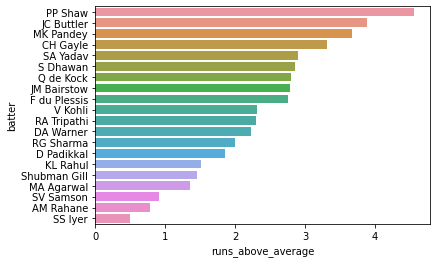

In [ ]:
sns.barplot(x='runs_above_average',y='batter',data=lppbf)

In [ ]:
runs_above_average_batters = all_league_mo.groupby('striker')['batter_credit'].sum().to_frame()
runs_above_average_batters.reset_index(inplace = True)
player_country = all_league_mo[['striker', 'batting_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'striker': 'batter'}, inplace=True)
player_innings = all_league_mo.groupby('striker').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_batters.rename(columns={'striker': 'batter'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_batters,player_innings,on='batter',how='inner')
final_score['runs_above_average'] = final_score['batter_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='batter',how='inner')
league_mo_batters = final_score_country[final_score_country['innings_played'] >=20].sort_values('runs_above_average' ,ascending = False)
league_mo_batters.drop(columns=['batting_team'],inplace=True)
league_mo_batters = league_mo_batters.drop_duplicates()
lmobf = league_mo_batters.sort_values(by="runs_above_average",ascending=False)[['batter','runs_above_average']].head(20)
lmobf

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,batter,runs_above_average
132,N Pooran,3.983210
194,SV Samson,2.445898
3,AD Russell,2.219231
133,N Rana,1.943006
72,Ishan Kishan,1.174695
109,MA Agarwal,0.989906
163,RR Pant,0.677157
90,KD Karthik,0.655265
1,AB de Villiers,0.296912
174,SA Yadav,-0.054135


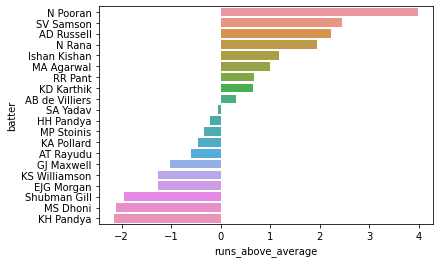

In [ ]:
sns.barplot(x='runs_above_average',y='batter',data=lmobf)

In [ ]:
runs_above_average_batters = all_league_do.groupby('striker')['batter_credit'].sum().to_frame()
runs_above_average_batters.reset_index(inplace = True)
player_country = all_league_do[['striker', 'batting_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'striker': 'batter'}, inplace=True)
player_innings = all_league_do.groupby('striker').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_batters.rename(columns={'striker': 'batter'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'striker': 'batter', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_batters,player_innings,on='batter',how='inner')
final_score['runs_above_average'] = final_score['batter_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='batter',how='inner')
league_do_batters = final_score_country[final_score_country['innings_played'] >=15].sort_values('runs_above_average' ,ascending = False)
league_do_batters.drop(columns=['batting_team'],inplace=True)
league_do_batters = league_do_batters.drop_duplicates()
ldobf = league_do_batters.sort_values(by="innings_played",ascending=False)[['batter','runs_above_average']].sort_values(by="runs_above_average",ascending=False).head(20)
ldobf

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,batter,runs_above_average
2,AB de Villiers,6.644346
4,AD Russell,5.237402
70,HH Pandya,4.892428
103,KA Pollard,4.807715
175,RA Jadeja,3.986121
183,RR Pant,3.453243
105,KD Karthik,3.189174
174,R Tewatia,2.838185
205,SO Hetmyer,2.754941
139,MP Stoinis,2.453764


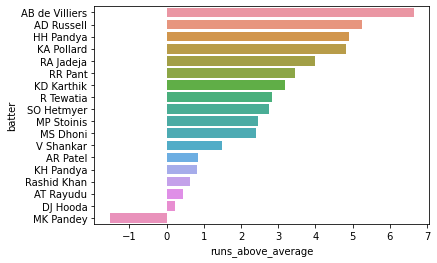

In [ ]:
sns.barplot(x='runs_above_average',y='batter',data=ldobf)

##Leagues Bowlers

In [ ]:
runs_above_average_bowlers = all_league_pp.groupby('bowler')['bowler_credit'].sum().to_frame()
runs_above_average_bowlers.reset_index(inplace = True)
player_country = all_league_pp[['bowler', 'bowling_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings = all_league_pp.groupby('bowler').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_bowlers.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_bowlers,player_innings,on='bowler',how='inner')
final_score['runs_above_average'] = final_score['bowler_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='bowler',how='inner')
league_pp_bowlers = final_score_country[final_score_country['innings_played'] >=20].sort_values('runs_above_average' ,ascending = False)
league_pp_bowlers.drop(columns=['bowling_team'],inplace=True)
league_pp_bowlers = league_pp_bowlers.drop_duplicates()
lppbw = league_pp_bowlers.sort_values(by="runs_above_average",ascending=False).head(20)
lppbw

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,bowler,bowler_credit,index,innings_played,runs_above_average
65,JC Archer,92.478294,12,26,3.556857
18,B Kumar,25.289010,9,27,0.936630
68,JJ Bumrah,29.125577,1,39,0.746810
81,KH Pandya,14.280163,14,25,0.571207
120,PJ Cummins,3.261443,20,21,0.155307
32,CV Varun,-0.987320,21,21,-0.047015
1,A Nortje,-10.496107,18,22,-0.477096
154,TA Boult,-17.472032,4,32,-0.546001
144,SP Narine,-18.538179,7,29,-0.639248
8,AR Patel,-17.014071,15,24,-0.708920


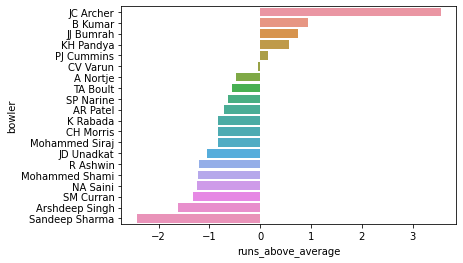

In [ ]:
sns.barplot(x='runs_above_average',y='bowler',data=lppbw)

In [ ]:
runs_above_average_bowlers = all_league_mo.groupby('bowler')['bowler_credit'].sum().to_frame()
runs_above_average_bowlers.reset_index(inplace = True)
player_country = all_league_mo[['bowler', 'bowling_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings = all_league_mo.groupby('bowler').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_bowlers.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_bowlers,player_innings,on='bowler',how='inner')
final_score['runs_above_average'] = final_score['bowler_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='bowler',how='inner')
league_mo_bowlers = final_score_country[final_score_country['innings_played'] >=20].sort_values('runs_above_average' ,ascending = False)
league_mo_bowlers.drop(columns=['bowling_team'],inplace=True)
league_mo_bowlers = league_mo_bowlers.drop_duplicates()
lmobw = league_mo_bowlers.sort_values(by="runs_above_average",ascending=False).head(20)
lmobw

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,bowler,bowler_credit,index,innings_played,runs_above_average
160,Rashid Khan,280.044236,1,43,6.512657
162,Ravi Bishnoi,92.147456,22,22,4.188521
75,JC Archer,71.407527,27,20,3.570376
178,SP Narine,135.218726,6,38,3.558388
36,CV Varun,104.044577,10,30,3.468153
79,JJ Bumrah,115.524419,8,34,3.397777
39,DJ Bravo,89.811161,12,28,3.207541
110,M Ashwin,57.068290,26,21,2.717538
121,MM Ali,51.027383,28,20,2.551369
205,YS Chahal,98.095107,2,40,2.452378


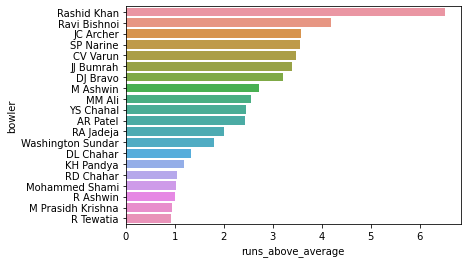

In [ ]:
sns.barplot(x='runs_above_average',y='bowler',data=lmobw)

In [ ]:
runs_above_average_bowlers = all_league_do.groupby('bowler')['bowler_credit'].sum().to_frame()
runs_above_average_bowlers.reset_index(inplace = True)
player_country = all_league_do[['bowler', 'bowling_team']]
player_country.drop_duplicates(inplace=True)
player_country = player_country.reset_index(drop=True)
player_country.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings = all_league_do.groupby('bowler').match_id.nunique().sort_values(ascending = False)
player_innings = player_innings.to_frame()
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
runs_above_average_bowlers.rename(columns={'bowler': 'bowler'}, inplace=True)
player_innings.reset_index(inplace = True)
player_innings.rename(columns={'bowler': 'bowler', 'match_id': 'innings_played'}, inplace=True)
final_score = pd.merge(runs_above_average_bowlers,player_innings,on='bowler',how='inner')
final_score['runs_above_average'] = final_score['bowler_credit'] / final_score['innings_played']
final_score.sort_values('runs_above_average' ,ascending = False)
final_score_country = pd.merge(final_score, player_country,on='bowler',how='inner')
#league_do_bowlers = final_score_country[(final_score_country['bowler_country'] == country) & (final_score_country['innings_played'] >=0)].sort_values('runs_above_average' ,ascending = False)
league_do_bowlers = final_score_country[final_score_country['innings_played'] >=20].sort_values('runs_above_average' ,ascending = False)
league_do_bowlers.drop(columns=['bowling_team'],inplace=True)
league_do_bowlers = league_do_bowlers.drop_duplicates()
ldobw = league_do_bowlers.sort_values(by="runs_above_average",ascending=False).head(20)
ldobw

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,bowler,bowler_credit,index,innings_played,runs_above_average
57,JJ Bumrah,59.953588,0,41,1.462283
1,A Nortje,27.345908,12,21,1.302186
24,CH Morris,19.127660,11,21,0.910841
93,Mohammed Siraj,8.775745,7,25,0.351030
54,JC Archer,-6.692554,8,24,-0.278856
126,SN Thakur,-11.507999,2,30,-0.383600
3,AD Russell,-12.689393,13,20,-0.634470
63,K Rabada,-26.938957,1,36,-0.748304
32,DJ Bravo,-31.633661,5,27,-1.171617
123,SM Curran,-34.901321,9,22,-1.586424


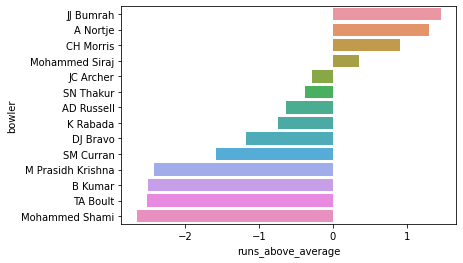

In [ ]:
sns.barplot(x='runs_above_average',y='bowler',data=ldobw)

In [ ]:
indiawc = ['RG Sharma','KL Rahul','V Kohli','SA Yadav','RR Pant','HH Pandya','RA Jadeja','B Kumar','Mohammed Shami','JJ Bumrah','CV Varun']
select[select['player'].isin(indiawc)][['player','weighted_total_raa','batting_label','bowling_label','role']]

,player,weighted_total_raa,batting_label,bowling_label,role
0,KL Rahul,1.148211,pdm,NaN,wicketkeeper
1,RG Sharma,1.946318,pdm,NaN,batter
4,HH Pandya,1.866273,dpm,dmp,allrounder
5,V Kohli,1.254045,dpm,NaN,batter
7,B Kumar,1.044398,NaN,pmd,bowler
8,RR Pant,-0.682003,mpd,NaN,wicketkeeper
12,RA Jadeja,2.693271,dpm,mdp,allrounder
18,JJ Bumrah,1.566472,NaN,dmp,bowler


In [ ]:
select[select['player'].isin(indiawc)].weighted_total_raa.sum()

10.836983974012483

In [ ]:
select

,index,player,pp_batting_raa,mo_batting_raa,do_batting_raa,batting_label,pp_bowling_raa,mo_bowling_raa,do_bowling_raa,bowling_label,...,bowl_type,is_avail,innings_batted_league,innings_bowled_league,innings_batted_country,innings_bowled_country,innings_batted,innings_bowled,is_filtered,integer_programming
0,3,KL Rahul,3.182696,-1.937061,-0.360881,pdm,0.000000,0.000000,0.000000,NaN,...,NaN,1,38.0,0.0,42.0,0.0,42.0,0.0,0,1.0
1,5,RG Sharma,2.866276,-0.571474,1.825278,pdm,0.000000,0.000000,0.000000,NaN,...,NaN,1,42.0,2.0,50.0,0.0,50.0,0.0,0,1.0
2,8,S Dhawan,1.822618,-3.858041,-3.491755,pdm,0.000000,0.000000,0.000000,NaN,...,NaN,1,49.0,0.0,44.0,0.0,44.0,0.0,0,0.0
3,9,S Dube,0.562201,0.969570,-0.594147,mpd,0.000000,-3.818190,-2.786850,pdm,...,pace,1,19.0,10.0,8.0,11.0,8.0,11.0,0,0.0
4,11,HH Pandya,0.105318,-0.971681,2.798563,dpm,-2.885142,0.696445,1.685081,dmp,...,pace,1,40.0,14.0,26.0,29.0,26.0,29.0,0,0.0
5,12,V Kohli,0.042131,-0.058384,2.499463,dpm,0.000000,0.000000,0.000000,NaN,...,NaN,1,44.0,0.0,44.0,0.0,44.0,0.0,0,1.0
6,14,SS Iyer,-0.484226,1.254061,0.321398,mdp,0.000000,0.000000,0.000000,NaN,...,NaN,1,40.0,0.0,25.0,0.0,25.0,0.0,0,1.0
7,15,B Kumar,-0.491964,-8.889190,-1.017459,NaN,1.615885,1.004612,-0.590493,pmd,...,pace,1,14.0,27.0,7.0,37.0,7.0,37.0,0,1.0
8,17,RR Pant,-0.591973,-0.539998,-1.288078,mpd,0.000000,0.000000,0.000000,NaN,...,NaN,1,45.0,0.0,29.0,0.0,29.0,0.0,0,1.0
9,19,MK Pandey,-0.691017,-0.902563,0.271612,dpm,0.000000,0.000000,0.000000,NaN,...,NaN,1,34.0,0.0,28.0,0.0,28.0,0.0,0,0.0
